Loading csv file into dataframe

In [3]:
import pandas as pd
df = pd.read_csv("games_march2025_cleaned.csv")
print(df.head())

    appid                             name release_date  required_age  price  \
0     730                 Counter-Strike 2   2012-08-21             0   0.00   
1  578080              PUBG: BATTLEGROUNDS   2017-12-21             0   0.00   
2     570                           Dota 2   2013-07-09             0   0.00   
3  271590        Grand Theft Auto V Legacy   2015-04-13            17   0.00   
4  359550  Tom Clancy's Rainbow Six® Siege   2015-12-01            17   3.99   

   dlc_count                               detailed_description  \
0          1  For over two decades, Counter-Strike has offer...   
1          0  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2          2  The most-played game on Steam. Every day, mill...   
3          0  When a young street hustler, a retired bank ro...   
4          9  Edition Comparison Ultimate Edition The Tom Cl...   

                                      about_the_game  \
0  For over two decades, Counter-Strike has offer...   
1  L

Cutting out un-needed columns for specific models

Metacritic Score VS. average playtime forever (Bar Graph)

In [4]:
df1 = df[['metacritic_score','average_playtime_forever']]
print(df1)

       metacritic_score  average_playtime_forever
0                     0                     33189
1                     0                         0
2                    90                     43031
3                    96                     19323
4                     0                     14204
...                 ...                       ...
89613                 0                         0
89614                 0                         0
89615                 0                         0
89616                 0                         0
89617                 0                         0

[89618 rows x 2 columns]


Postive/Negative reviews and peak concurrent users (Heatmap)

In [5]:
df2 = df[['positive','negative', 'peak_ccu']]
print(df2)

       positive  negative  peak_ccu
0       7480813   1135108   1212356
1       1487960   1024436    616738
2       1998462    451338    555977
3       1719950    250012    117698
4       1152763    218446     89916
...         ...       ...       ...
89613         2         0         0
89614         2         0         0
89615         2         1         0
89616         2         0         0
89617         8         4         0

[89618 rows x 3 columns]


price and discount VS recommendations and metacritic scores (Naive Bayes)

In [6]:
df3 = df[['price','discount', 'recommendations', 'metacritic_score']]
print(df3)

       price  discount  recommendations  metacritic_score
0       0.00         0          4401572                 0
1       0.00         0          1732007                 0
2       0.00         0            14337                90
3       0.00         0          1803063                96
4       3.99        80          1165929                 0
...      ...       ...              ...               ...
89613   3.99         0                0                 0
89614  10.00         0                0                 0
89615   1.99         0                0                 0
89616  29.99         0                0                 0
89617   9.99         0                0                 0

[89618 rows x 4 columns]


Models for each dataframe

Bar Graph for df1

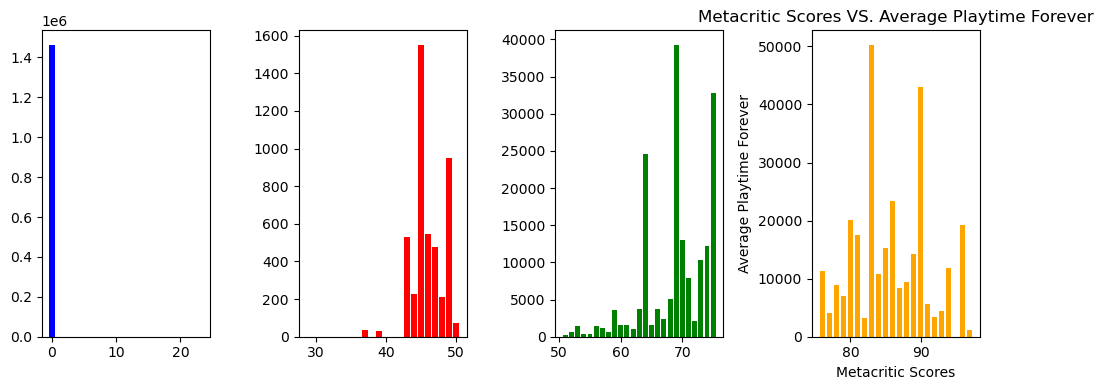

In [7]:
import matplotlib.pyplot as plt

# Creating seperate segments for different score values
section1_df1 = df1[ (df1['metacritic_score'] >= 0) & (df1['metacritic_score'] <= 25) ]
section2_df1 = df1[ (df1['metacritic_score'] > 25) & (df1['metacritic_score'] <= 50) ]
section3_df1 = df1[ (df1['metacritic_score'] >= 51) & (df1['metacritic_score'] <= 75) ]
section4_df1 = df1[ (df1['metacritic_score'] > 75) & (df1['metacritic_score'] <= 100) ]

category_A_df1 = df1[df1['metacritic_score'] == 1]

# Plotting data
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

axes[0].bar(section1_df1['metacritic_score'], section1_df1['average_playtime_forever'], color='blue')

axes[1].bar(section2_df1['metacritic_score'], section2_df1['average_playtime_forever'], color='red')

axes[2].bar(section3_df1['metacritic_score'], section3_df1['average_playtime_forever'], color='green')

axes[3].bar(section4_df1['metacritic_score'], section4_df1['average_playtime_forever'], color='orange')

plt.title('Metacritic Scores VS. Average Playtime Forever')
plt.xlabel('Metacritic Scores')
plt.ylabel('Average Playtime Forever')
plt.tight_layout()
plt.show()

Heatmap for df2

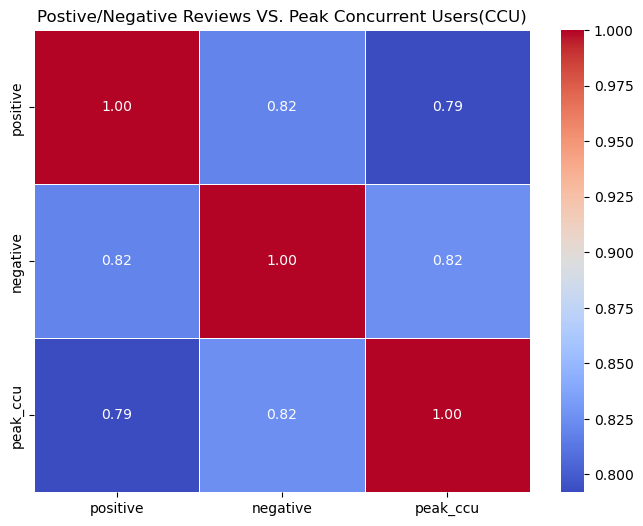

In [8]:
import seaborn as sns

correlation_matrix = df2.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Postive/Negative Reviews VS. Peak Concurrent Users(CCU)')
plt.show()

Naive Bayes for df3

Price with Recommendations

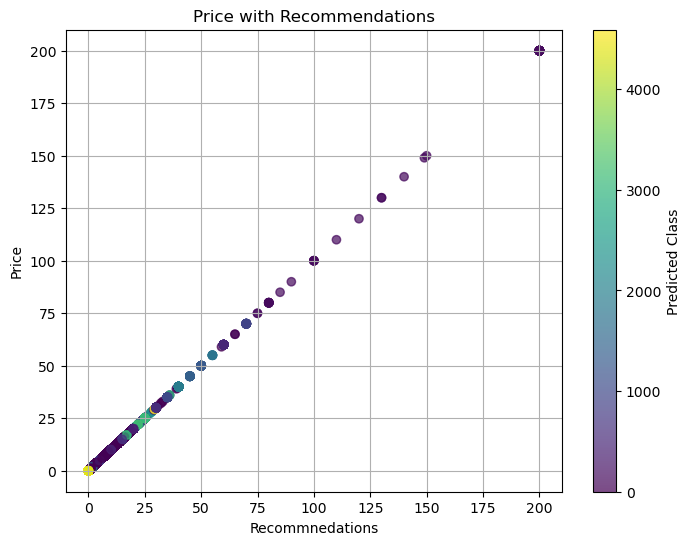

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

X = df3[['price']]
y = df3['recommendations']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the test data with predicted classes
plt.figure(figsize=(8, 6))
plt.scatter(X_test['price'], X_test['price'], c=y_pred, cmap='viridis', alpha=0.7)
plt.xlabel('Recommnedations')
plt.ylabel('Price')
plt.title('Price with Recommendations')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()

Discounts with Recommendations

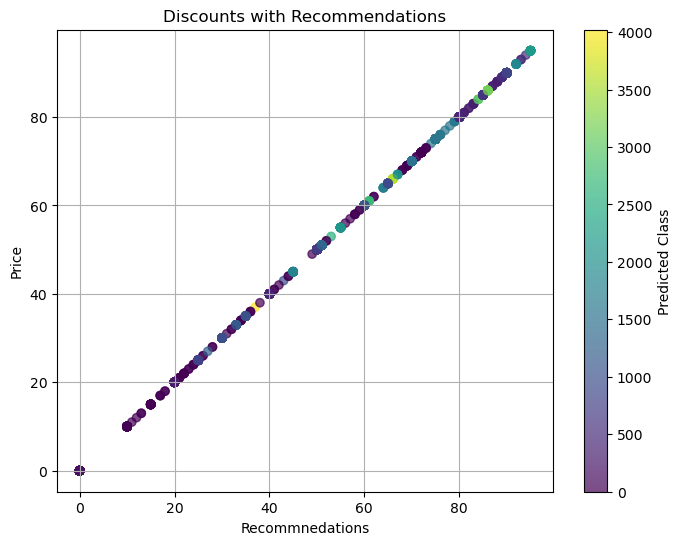

In [10]:
X = df3[['discount']]
y = df3['recommendations']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the test data with predicted classes
plt.figure(figsize=(8, 6))
plt.scatter(X_test['discount'], X_test['discount'], c=y_pred, cmap='viridis', alpha=0.7)
plt.xlabel('Recommnedations')
plt.ylabel('Price')
plt.title('Discounts with Recommendations')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()

Price with Metacritic Scores

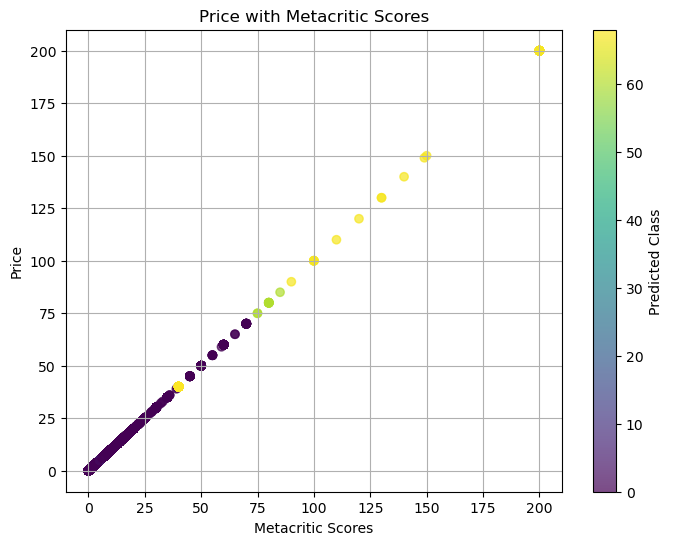

In [11]:
X = df3[['price']]
y = df3['metacritic_score']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the test data with predicted classes
plt.figure(figsize=(8, 6))
plt.scatter(X_test['price'], X_test['price'], c=y_pred, cmap='viridis', alpha=0.7)
plt.xlabel('Metacritic Scores')
plt.ylabel('Price')
plt.title('Price with Metacritic Scores')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()

Discounts with Metacritic Scores

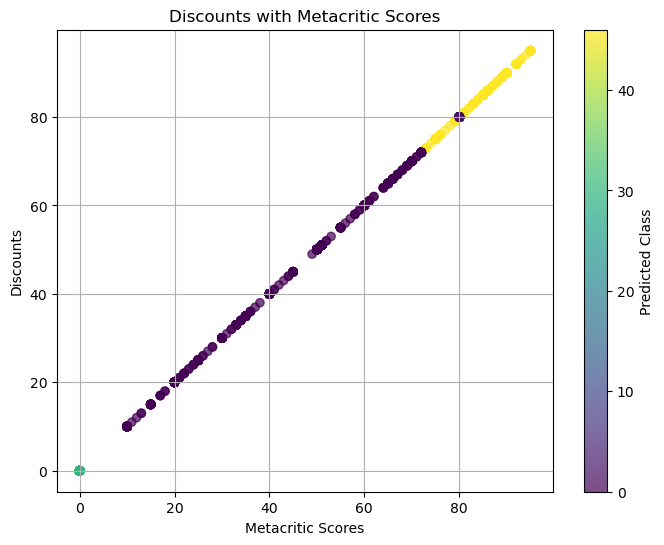

In [12]:
X = df3[['discount']]
y = df3['metacritic_score']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the test data with predicted classes
plt.figure(figsize=(8, 6))
plt.scatter(X_test['discount'], X_test['discount'], c=y_pred, cmap='viridis', alpha=0.7)
plt.xlabel('Metacritic Scores')
plt.ylabel('Discounts')
plt.title('Discounts with Metacritic Scores')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()